In [1]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Okt

In [2]:
fp = codecs.open("2BEXXX01.txt", "r", encoding="utf-8") #토지 2권 - txt이지만 내용은 xml 태그 구조

In [3]:
soup = BeautifulSoup(fp, "html.parser")
body = soup.select_one("text > body")
text = body.getText()
print(text[:100])


제2편 추적과 음모
14장 추적
귀녀의 모습을 한번 쳐다보고 떠나려 했다. 집안을 이리저리 기웃거리던 강포수는 윤씨부인에게 인사를 올리고 중문을 나서는 치수 뒷모습을 보았다. 실


# Counter 모듈

Counter는 컬렉션(Collection)에 속한 모듈. Counter의 원소는 dictionary 형태 - key:원소, value: (발생)빈도. 

In [4]:
from collections import Counter

s = 'aabbbcdddeeeefffff'

container = Counter(s)
#container
for key, val in container.items():
    print(key, ':', val)
print()    
print('원소=', set(container.elements()))

a : 2
b : 3
c : 1
d : 3
e : 4
f : 5

원소= {'c', 'a', 'e', 'd', 'b', 'f'}


In [5]:
container.most_common(3) #빈도 순으로 3개 원소를 출력

[('f', 5), ('e', 4), ('b', 3)]

In [6]:
nouns_tagger = Okt()
word_dic = {}

lines = text.split("\r\n")
for line in lines:
    noun_list = nouns_tagger.nouns(line)
    for word in noun_list:
        if not (word in word_dic):
            word_dic[word] = 0
        word_dic[word] += 1 

In [7]:
#빈도 수를 기준으로 정렬
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)  

for word, count in keys[:10]:
    print("{0}({1}) ".format(word, count), end="")
print()  

것(322) 그(217) 말(207) 치수(192) 포수(176) 강(174) 안(109) 수동(102) 사람(99) 생각(99) 


In [8]:
from collections import Counter

nouns_tagger = Okt()
nouns_list = nouns_tagger.nouns(text)
container2 = Counter(nouns_list)
container2.most_common(10)

[('것', 322),
 ('그', 217),
 ('말', 207),
 ('치수', 192),
 ('포수', 176),
 ('강', 174),
 ('안', 109),
 ('수동', 102),
 ('사람', 99),
 ('생각', 99)]

In [9]:
len(container2)

3695

In [10]:
# 한 글자인 단어를 제거
new_container = Counter({ x : container2[x] for x in container2 if len(x) > 1})
new_container.most_common(10)

[('치수', 192),
 ('포수', 176),
 ('수동', 102),
 ('사람', 99),
 ('생각', 99),
 ('얼굴', 72),
 ('소리', 72),
 ('용이', 62),
 ('서방', 60),
 ('우관', 58)]

In [11]:
print(len(new_container))

3219


In [12]:
# https://www.ranks.nl/stopwords/korean
kr_stopwords = "kr_stopwords.txt"

with open(kr_stopwords, encoding='utf8') as f:
    raw_list = f.readlines()
stopword_list = [x.strip() for x in raw_list]

In [13]:
print(len(stopword_list))

675


In [14]:
new_container = Counter({x:new_container[x] for x in new_container if x not in stopword_list})

In [15]:
print(len(new_container))

3143


In [16]:
#for key, val in new_container.items():  
#    print(key, ':', val, end="")

In [17]:
toji_stopwords = ['상위', '영영', '간혹', '아무', '여느', '무지', '우짜', '뚝딱', '오늘이', '가라', '아얏', 
                       '오냐', '종종', '와드득', '하는', '아니겄소', '곧잘', '겄너', '가야', '으이잉']

for w in toji_stopwords:
    stopword_list.append(w)

In [18]:
import random
import pytagcloud
import webbrowser

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [19]:
# 발생 빈도 순으로 40개 단어 선택 
ranked_tags = new_container.most_common(40)

# 워드 클라우드(pytagcloud)로 출력할 단어 리스트 : ranked_tags
# 단어 최대 크기(maxsize): 80
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

In [20]:
# 워드 클라우드 이미지 생성(wordcloud.jpg)
# 폰트: NanumGothic
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), 
                            fontname='NanumGothic', rectangular=False)

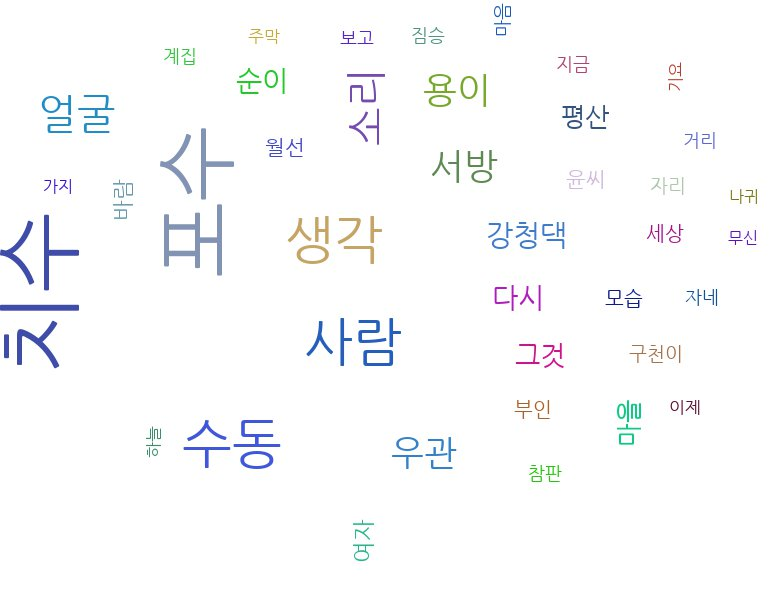

In [21]:
from IPython.display import Image
Image(filename='wordcloud.jpg')

In [23]:
from konlpy.corpus import kolaw

text2 = kolaw.open('constitution.txt').read()

In [24]:
from collections import Counter

nouns_tagger = Okt()
nouns_list2 = nouns_tagger.nouns(text2)
law_container = Counter(nouns_list2)
law_container.most_common(10)

[('제', 175),
 ('법률', 127),
 ('정', 89),
 ('수', 88),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('때', 55)]

In [26]:
len(law_container)

929

In [27]:
# 한 글자인 단어를 제거
law_container2 = Counter({ x : law_container[x] for x in law_container if len(x) > 1})
law_container2.most_common(10)

[('법률', 127),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('헌법', 53),
 ('모든', 37),
 ('기타', 26),
 ('사항', 23),
 ('권리', 21)]

In [28]:
print(len(law_container2))

850


In [29]:
law_container2 = Counter({x:law_container2[x] for x in law_container2 if x not in stopword_list})

In [30]:
print(len(law_container2))

832


In [31]:
for key, val in law_container2.items():  
    print(key, ':', val, end="")

대한민국 : 11헌법 : 53유구 : 1역사 : 1전통 : 1국민 : 61운동 : 2건립 : 1임시정부 : 1통과 : 1불의 : 2항거 : 1민주 : 6이념 : 1계승 : 2조국 : 3개혁 : 1평화 : 6통일 : 6사명 : 2각하 : 1정의 : 1인도 : 1동포 : 1민족 : 3단결 : 1공고 : 3모든 : 37사회 : 8폐습 : 1타파 : 1자율 : 2조화 : 2바탕 : 1자유민주 : 2질서 : 8더욱 : 1정치 : 9경제 : 18문화 : 4영역 : 4각인 : 1기회 : 3능력 : 3최고 : 2도로 : 1발휘 : 1자유 : 20권리 : 21책임 : 5의무 : 18완수 : 1생활 : 8향상 : 5기하 : 1항구 : 1세계 : 1인류 : 1공영 : 1이바지 : 1자손 : 1안전 : 1행복 : 2확보 : 1다짐 : 1제정 : 8개정 : 6이제 : 1국회 : 68의결 : 17국민투표 : 7민주공화국 : 1주권 : 2권력 : 1요건 : 1법률 : 127국가 : 73재외국민 : 1보호 : 14영토 : 2한반도 : 1부속 : 1도서 : 1지향 : 1입각 : 1정책 : 14수립 : 7추진 : 1국제 : 4유지 : 7노력 : 13침략 : 1전쟁 : 1부인 : 1국군 : 4안전보장 : 10국토 : 3방위 : 1수행 : 4중립성 : 3준수 : 2체결 : 4공포 : 10조약 : 11일반 : 2승인 : 6법규 : 1국내법 : 1효력 : 9외국인 : 1지위 : 3보장 : 13공무원 : 17전체 : 1대한 : 10봉사자 : 1대하 : 9신분 : 3정당 : 14설립 : 1복수정당제 : 1목적 : 4조직 : 18활동 : 3의사 : 2형성 : 1참여 : 1운영 : 5자금 : 1보조 : 1위배 : 2정부 : 20헌법재판소 : 14해산 : 5제소 : 3심판 : 10전통문화 : 1발전 : 5창달 : 2인간 : 3존엄 : 2가치 : 1가지 : 2추구 : 1개인 : 3불가침 : 1기본 : 5인권 : 1확인 : 1성별 : 1종교 : 3차별 : 2특수 : 1계급 : 1제도 : 4인정 : 8형태 : 1

In [38]:
law_stopwords = ['모든', '더욱', '이제', '당한', '앞서', '통한', '거나',
                 '이하', '내지', '이리', '로서', '유독', '거듭']

for w in law_stopwords:
    stopword_list.append(w)

In [39]:
law_container2 = Counter({x:law_container2[x] for x in law_container2 if x not in stopword_list})

In [40]:
print(len(law_container2))

820


In [41]:
# 발생 빈도 순으로 40개 단어 선택 
ranked_tags = law_container2.most_common(40)

# 워드 클라우드(pytagcloud)로 출력할 단어 리스트 : ranked_tags
# 단어 최대 크기(maxsize): 80
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

In [42]:
# 워드 클라우드 이미지 생성(wordcloud.jpg)
# 폰트: NanumGothic
pytagcloud.create_tag_image(taglist, 'wordcloud2.jpg', size=(900, 600), 
                            fontname='NanumGothic', rectangular=False)

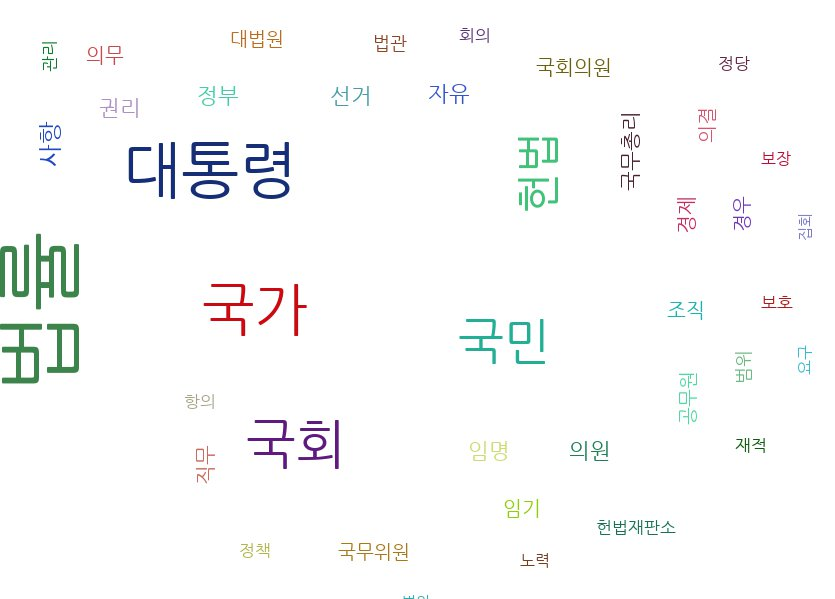

In [43]:
from IPython.display import Image
Image(filename='wordcloud2.jpg')